<a href="https://colab.research.google.com/github/DoniaElrashidy/Intro-to-Deep-Learning/blob/main/ShallowNueralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://miro.medium.com/v2/resize:fit:850/1*8-ze3V28iOn6U_60Wh171g.png'>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ReLU(x):
  return np.maximum(0, x)

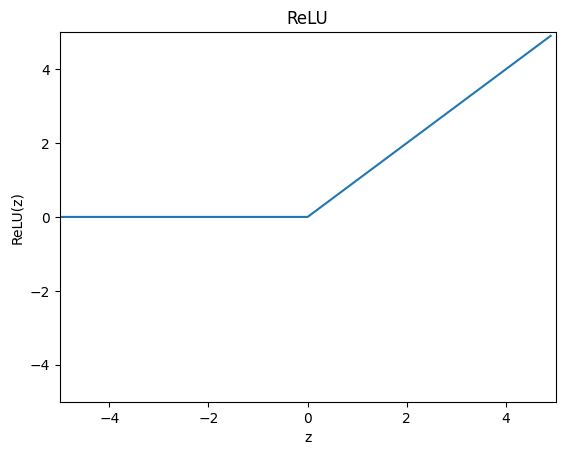

In [7]:
z = np.arange(-5, 5, 0.1)
ReLU_z = ReLU(z)

fig, ax = plt.subplots()

ax.set_xlabel('z')
ax.set_ylabel('ReLU(z)')

plt.xlim(-5, 5)
plt.ylim(-5, 5)

ax.plot(z, ReLU_z)
plt.title('ReLU')
plt.show()

<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcST9hiL73oc16Bo4C4OPHtrUPaTcKl8r3eIi1ulvzWHljmspDMn'>

In [18]:
# Define a shallow neural network with one input, one output, and three hidden units
def shallow_nn(x, activation_fn, theta_10, theta_20, theta_30, theta_11, theta_21, theta_31, phi_0, phi_1, phi_2, phi_3):
  # Compute preactivations (before applying activation function)
  pre_1 = theta_11 * x + theta_10 #h1
  pre_2 = theta_21 * x + theta_20 #h2
  pre_3 = theta_31 * x + theta_30 #h3

  # Apply activation function
  h1 = activation_fn(pre_1)
  h2 = activation_fn(pre_2)
  h3 = activation_fn(pre_3)

  # Weight the activations
  w_h1 = phi_1 * h1
  w_h2 = phi_2 * h2
  w_h3 = phi_3 * h3

  # output
  y = phi_0 + w_h1 + w_h2 + w_h3

  return y, pre_1, pre_2, pre_3, h1, h2, h3, w_h1, w_h2, w_h3


In [29]:
def plot_neural(x, y, pre_1, pre_2, pre_3, h1, h2, h3, w_h1, w_h2, w_h3, plot_all=False, x_data=None, y_data=None):

  # Plot intermediate plots if flag set
  if plot_all:
    fig, ax = plt.subplots(3,3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    ax[0,0].plot(x,pre_1,'r-'); ax[0,0].set_ylabel('Preactivation')
    ax[0,1].plot(x,pre_2,'b-'); ax[0,1].set_ylabel('Preactivation')
    ax[0,2].plot(x,pre_3,'g-'); ax[0,2].set_ylabel('Preactivation')
    ax[1,0].plot(x,h1,'r-'); ax[1,0].set_ylabel('Activation')
    ax[1,1].plot(x,h2,'b-'); ax[1,1].set_ylabel('Activation')
    ax[1,2].plot(x,h3,'g-'); ax[1,2].set_ylabel('Activation')
    ax[2,0].plot(x,w_h1,'r-'); ax[2,0].set_ylabel('Weighted Act')
    ax[2,1].plot(x,w_h2,'b-'); ax[2,1].set_ylabel('Weighted Act')
    ax[2,2].plot(x,w_h3,'g-'); ax[2,2].set_ylabel('Weighted Act')

    for plot_y in range(3):
      for plot_x in range(3):
        ax[plot_y,plot_x].set_xlim([0,1]);ax[plot_x,plot_y].set_ylim([-1,1])
        ax[plot_y,plot_x].set_aspect(0.5)
      ax[2,plot_y].set_xlabel('Input, ');
    plt.show()

    fig, ax = plt.subplots()
  ax.plot(x,y)
  ax.set_xlabel('Input, '); ax.set_ylabel('Output, ')
  ax.set_xlim([0,1]);ax.set_ylim([-1,1])
  ax.set_aspect(0.5)
  if x_data is not None:
    ax.plot(x_data, y_data, 'mo')
    for i in range(len(x_data)):
      ax.plot(x_data[i], y_data[i],)
  plt.show()

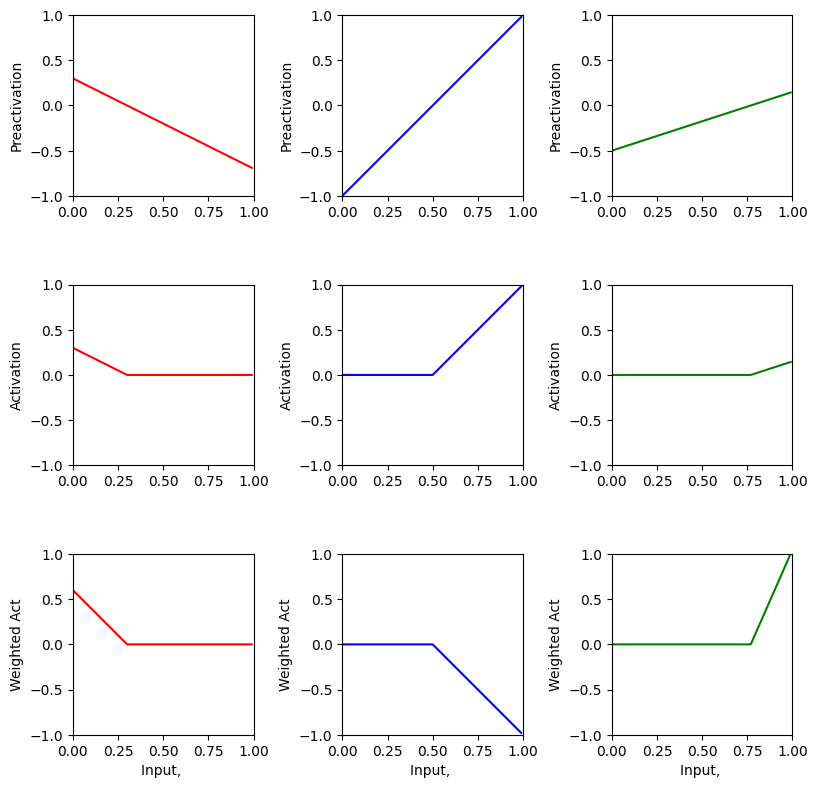

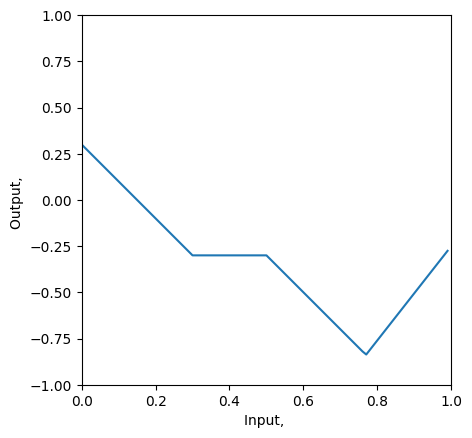

In [31]:
# Now lets define some parameters and run the neural network
theta_10 =  0.3 ; theta_11 = -1.0
theta_20 = -1.0  ; theta_21 = 2.0
theta_30 = -0.5  ; theta_31 = 0.65
phi_0 = -0.3; phi_1 = 2.0; phi_2 = -1.0; phi_3 = 7.0

# Define a range of input values
x = np.arange(0,1,0.01)

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3,h1, h2, h3, w_h1, w_h2, w_h3 = \
shallow_nn(x, ReLU, theta_10, theta_20, theta_30, theta_11, theta_21, theta_31, phi_0, phi_1, phi_2, phi_3)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, h1, h2, h3, w_h1, w_h2, w_h3, plot_all=True)


#Least squares loss


$$ L[\phi] = \sum_{i=1}^{I} \left( y_i - f[x_i, \phi] \right)^2 $$



In [32]:
# Least squares function
def least_squares_loss(y_train, y_predict):
    # Compute the sum of squared differences between real and predicted values
    loss = np.sum((y_train - y_predict) ** 2)
    return loss

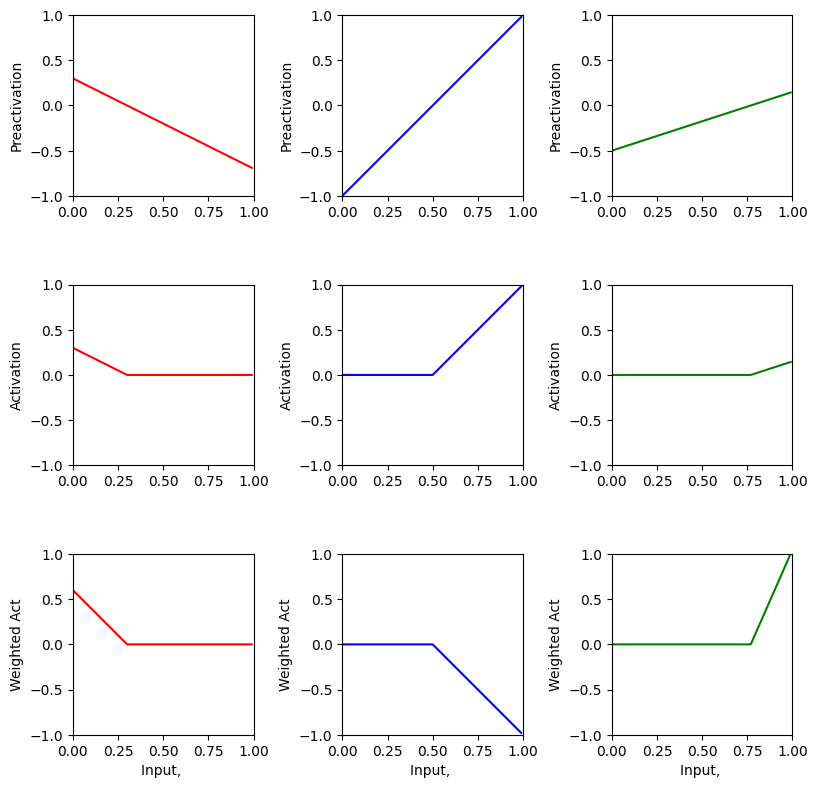

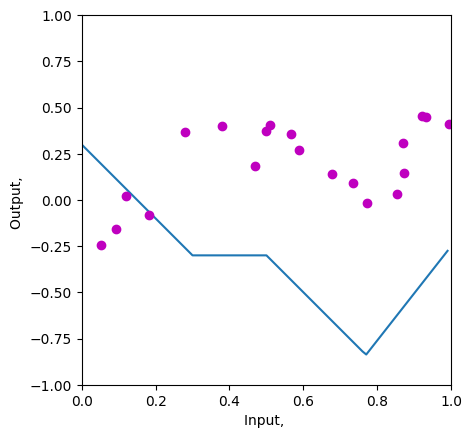

Your Loss = 9.385, True value = 9.385


In [41]:
# Define a range of input values
x = np.arange(0,1,0.01)

x_train = np.array([0.09291784,0.46809093,0.93089486,0.67612654,0.73441752,0.86847339,\
                   0.49873225,0.51083168,0.18343972,0.99380898,0.27840809,0.38028817,\
                   0.12055708,0.56715537,0.92005746,0.77072270,0.85278176,0.05315950,\
                   0.87168699,0.58858043])
y_train = np.array([-0.15934537,0.18195445,0.451270150,0.13921448,0.09366691,0.30567674,\
                    0.372291170,0.40716968,-0.08131792,0.41187806,0.36943738,0.3994327,\
                    0.019062570,0.35820410,0.452564960,-0.0183121,0.02957665,-0.24354444, \
                    0.148038840,0.26824970])

y, pre_1, pre_2, pre_3, h1, h2, h3, w_h1, w_h2, w_h3 = \
   shallow_nn(x, ReLU, theta_10, theta_20, theta_30, theta_11, theta_21, theta_31, phi_0, phi_1, phi_2, phi_3)
# And then plot it
plot_neural(x, y, pre_1, pre_2, pre_3, h1, h2, h3, w_h1, w_h2, w_h3, plot_all=True, x_data = x_train, y_data = y_train)


# Run the neural network on the training data
y_predict, *_ = shallow_nn(x_train, ReLU, theta_10, theta_20, theta_30, theta_11, theta_21, theta_31, phi_0, phi_1, phi_2, phi_3)

# Compute the least squares loss and print it out
loss = least_squares_loss(y_train,y_predict)
print('Your Loss = %3.3f, True value = 9.385'%(loss))

